In [1]:
!pip install keras-tuner --quiet

In [ ]:
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Convertir la cadena CSV en un dataframe
train_base = pd.read_csv('Spaceship_Titanic/train.csv')
print(train_base.columns, train_base.shape)
test_base = pd.read_csv('Spaceship_Titanic/test.csv')
print(test_base.columns, test_base.shape)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object') (8693, 14)
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object') (4277, 13)


In [2]:
#categorice to numeric
train = train_base.copy()

#factorize homeplanet
train['HomePlanet'] ,HomePlanet = pd.factorize(train_base['HomePlanet'])
print(HomePlanet)

#factorize Destination
train['Destination'] ,Destination = pd.factorize(train_base['Destination'])
print(Destination)

#factorize Cabin
train['Cabin'] ,Cabin = pd.factorize(train_base['Cabin'])
print(Cabin)

train

Index(['Europa', 'Earth', 'Mars'], dtype='object')
Index(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype='object')
Index(['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P', 'F/2/S', 'G/0/S', 'F/3/S',
       'B/1/P', 'F/1/P',
       ...
       'G/1505/P', 'G/1497/S', 'G/1507/P', 'F/1894/P', 'G/1508/P', 'A/97/P',
       'A/98/P', 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype='object', length=6560)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0,False,0,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,1,False,1,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,0,False,2,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,0,False,2,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,1,False,3,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,False,6556,2,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,1,True,6557,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,1,False,6558,0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,0,False,6559,2,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
#remove columns dont have relevance information
train = train[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']]

In [4]:
train.astype(float)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,0.0,0.0,2.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,0.0,0.0,2.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,1.0,0.0,3.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.0,6556.0,2.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0
8689,1.0,1.0,6557.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,1.0,0.0,6558.0,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0
8691,0.0,0.0,6559.0,2.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0.0


C:\Users\orp\AppData\Local\Temp\ipykernel_9192\2064989722.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


              HomePlanet     Cabin  Destination       Age  RoomService  \
HomePlanet      1.000000 -0.004802    -0.212843 -0.120503     0.178878   
Cabin          -0.004802  1.000000    -0.000167 -0.007797    -0.003791   
Destination    -0.212843 -0.000167     1.000000  0.004248    -0.044733   
Age            -0.120503 -0.007797     0.004248  1.000000     0.068723   
RoomService     0.178878 -0.003791    -0.044733  0.068723     1.000000   
FoodCourt      -0.279357 -0.009717     0.110659  0.130421    -0.015889   
ShoppingMall    0.077910  0.019949    -0.022977  0.033133     0.054480   
Spa            -0.203228 -0.009816     0.053614  0.123970     0.010080   
VRDeck         -0.228913  0.015029     0.073654  0.101007    -0.019581   
Transported    -0.094689  0.021866     0.104817 -0.075026    -0.244611   

              FoodCourt  ShoppingMall       Spa    VRDeck  Transported  
HomePlanet    -0.279357      0.077910 -0.203228 -0.228913    -0.094689  
Cabin         -0.009717      0.019949 -

<Axes: >

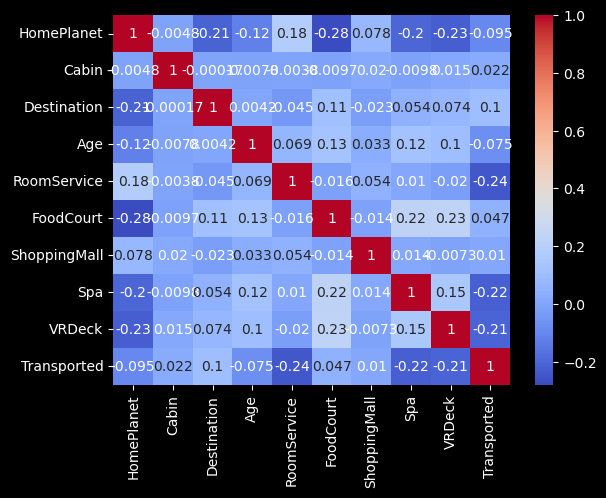

In [5]:
# Calcular la matriz de correlación
corr_matrix = train.corr()
print(corr_matrix)
# Crear el gráfico de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


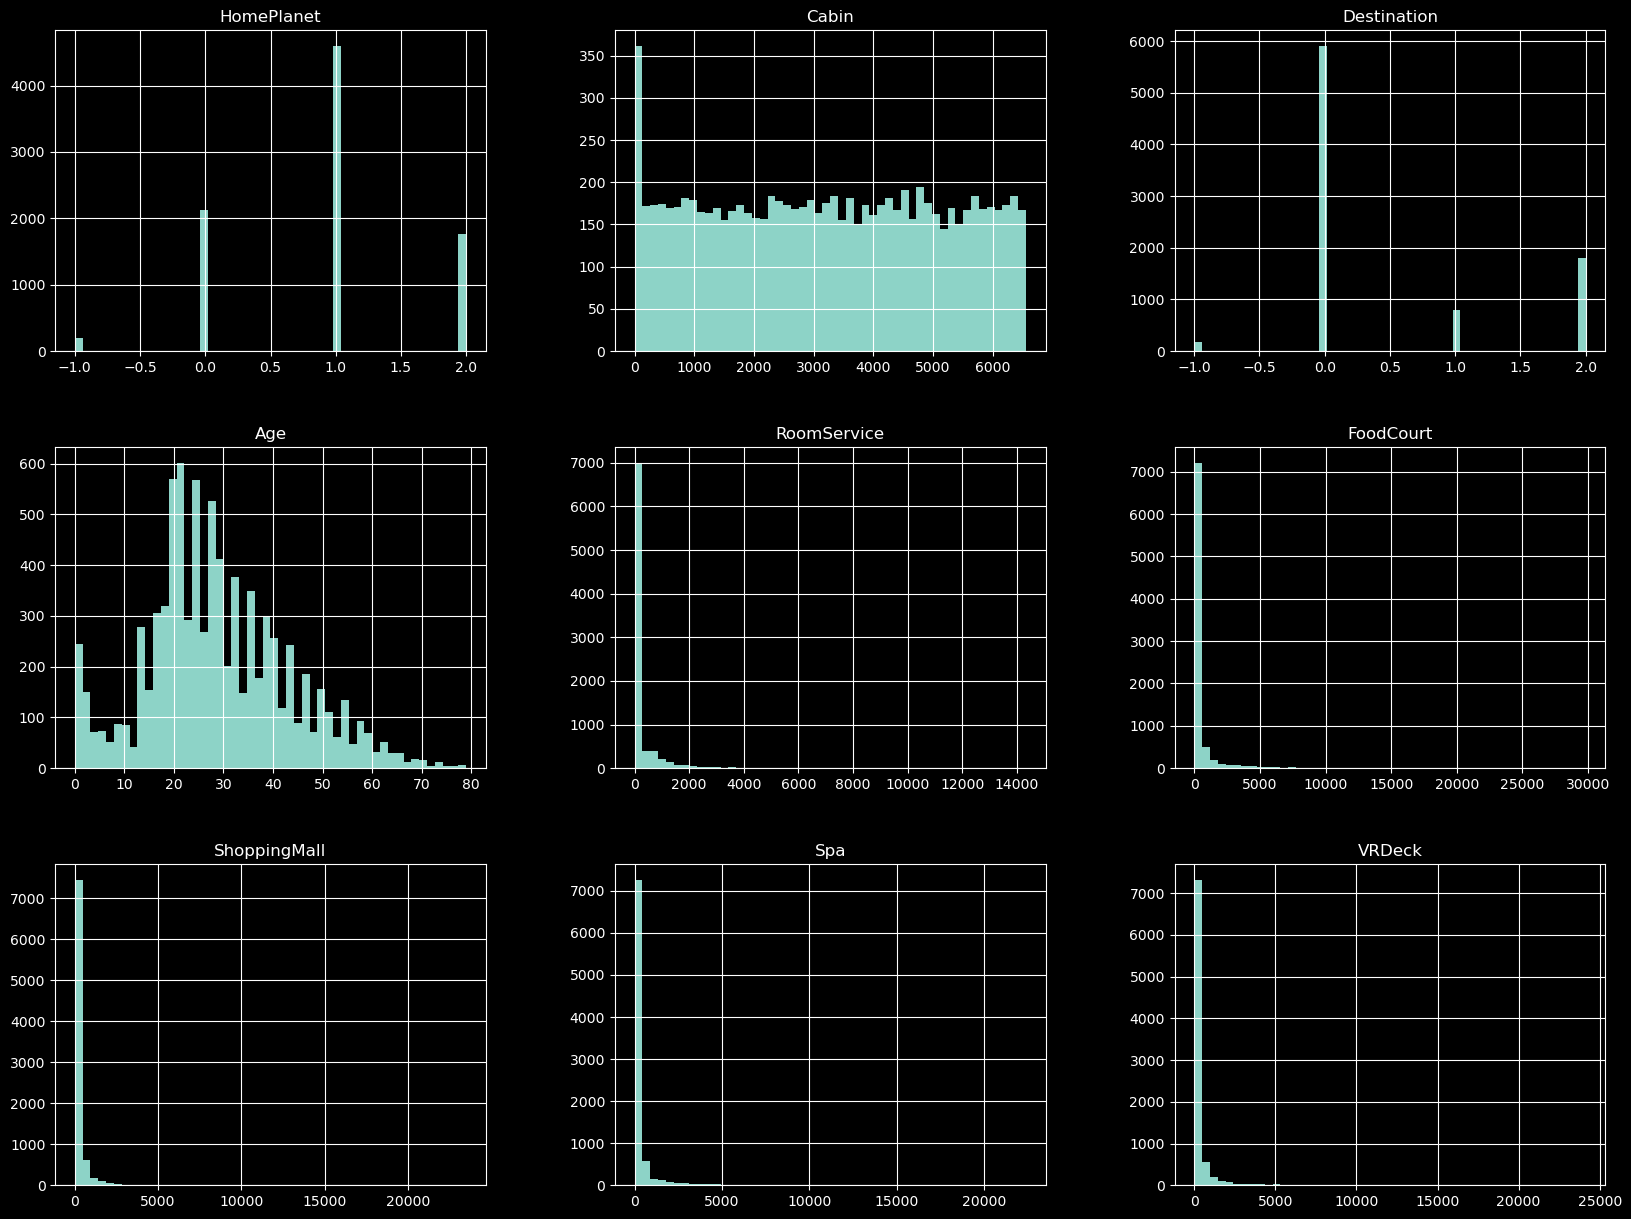

In [6]:
#generate histogram for each numeric variable
train.hist(bins=50, figsize=(20,15))
plt.show()


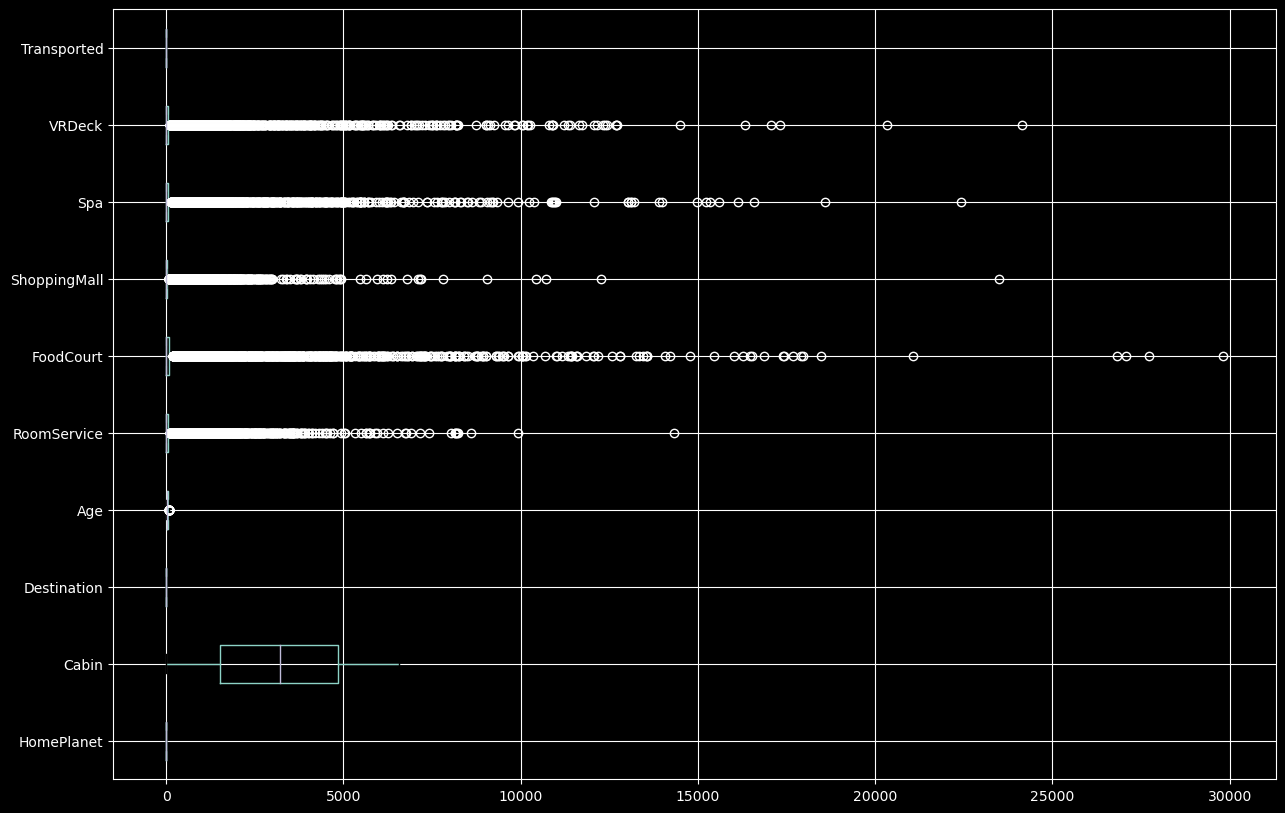

In [7]:
# draw boxplots for all numeric columns horizontally
train.boxplot(vert=False, figsize=(15,10))
plt.show()

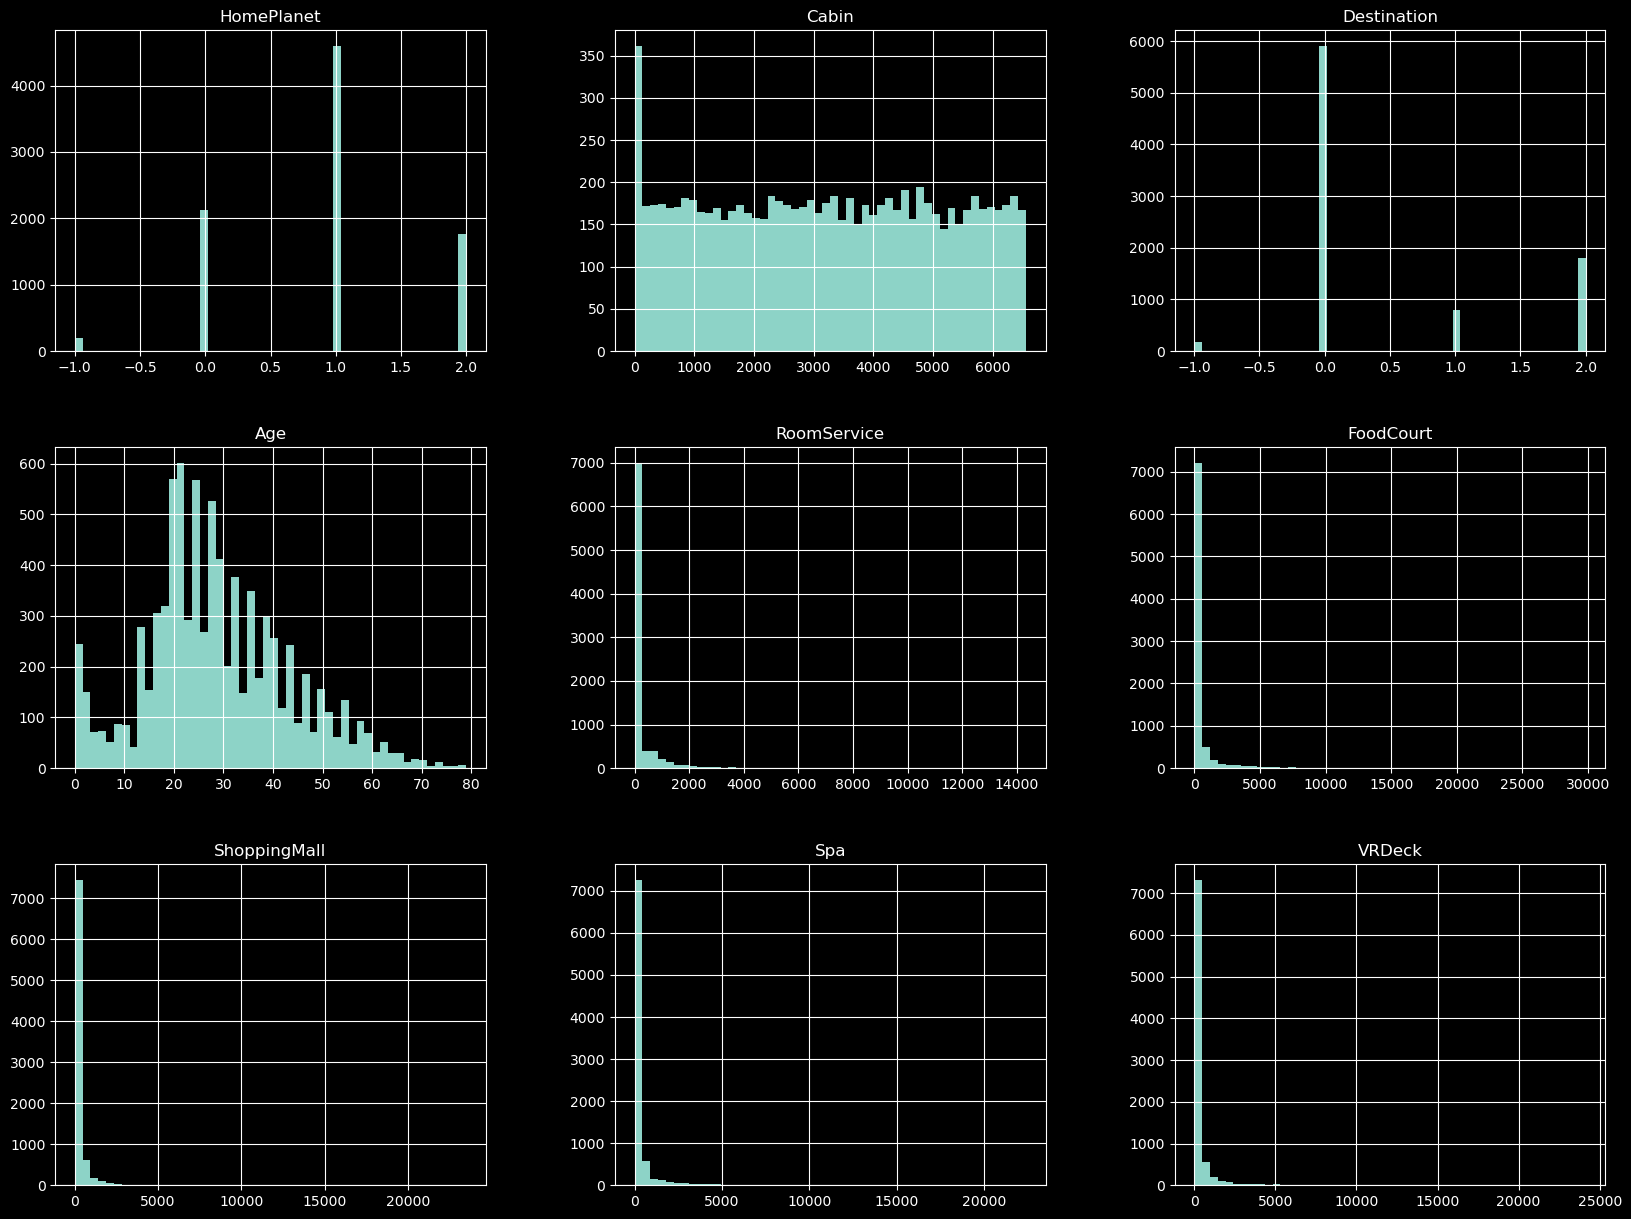

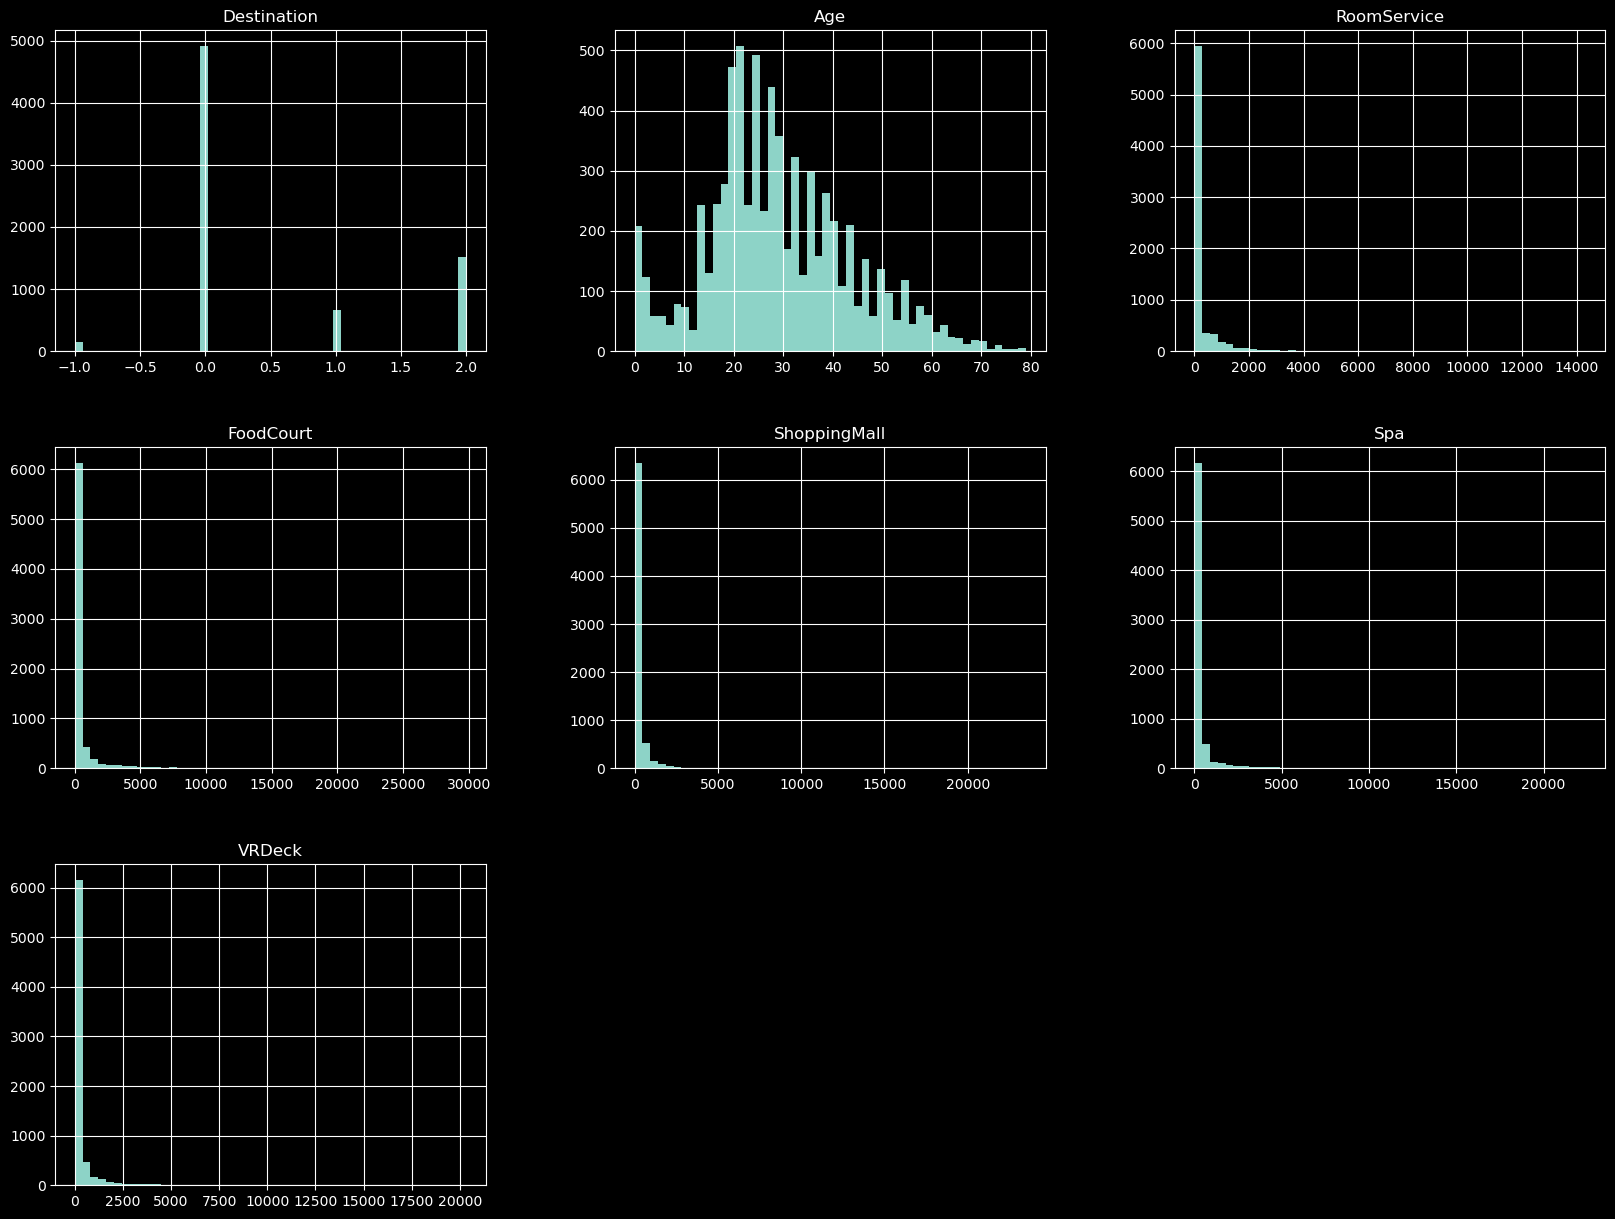

In [47]:
#simple remove of outers
filtro = [0.89, 0.99, 0.94]
train_filtered = train.copy()

# train_filtered = train_filtered[train_filtered.VRDeck > train_filtered.VRDeck.quantile(0.25)]
# train_filtered = train_filtered[train_filtered.Spa > train_filtered.Spa.quantile(0.25)]
# train_filtered = train_filtered[train_filtered.RoomService > train_filtered.RoomService.quantile(0.25)]
# train_filtered = train_filtered[train_filtered.ShoppingMall > train_filtered.ShoppingMall.quantile(0.25)]
# train_filtered = train_filtered[train_filtered.FoodCourt > train_filtered.FoodCourt.quantile(0.25)]

train_filtered.hist(bins=50, figsize=(20,15))
plt.show()

#remove nan or null values
train_filtered = train_filtered.dropna()

#remove Cabin 
train_filtered = train_filtered.drop(['Cabin'], axis=1)
train_filtered = train_filtered.drop(['HomePlanet'], axis=1)
# #and filter > 95%
#train_filtered = train_filtered[train_filtered.VRDeck < train_filtered.VRDeck.quantile(filtro[0])]
#train_filtered = train_filtered[train_filtered.Spa < train_filtered.Spa.quantile(filtro[1])]
#train_filtered = train_filtered[train_filtered.RoomService < train_filtered.RoomService.quantile(filtro[2])]




train_filtered.hist(bins=50, figsize=(20,15))
plt.show()

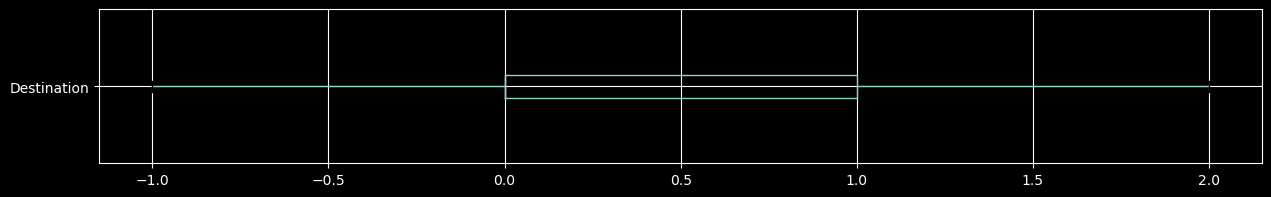

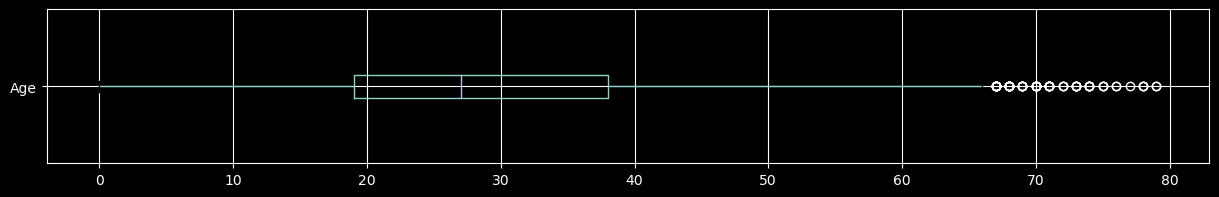

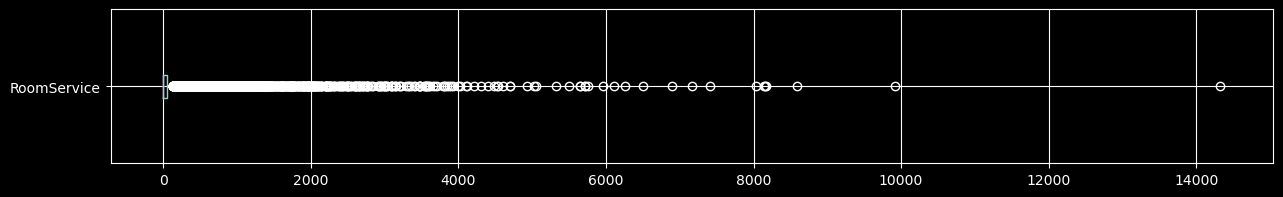

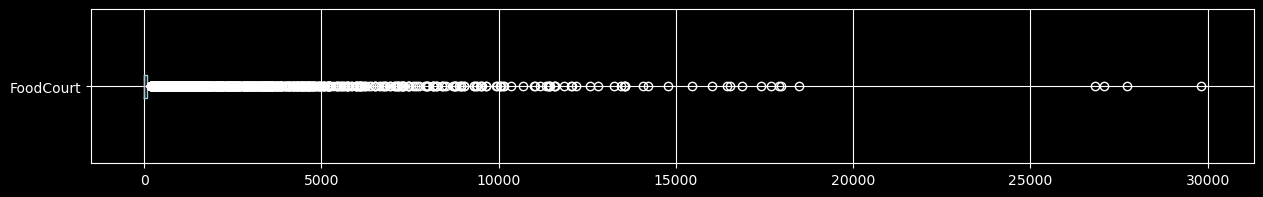

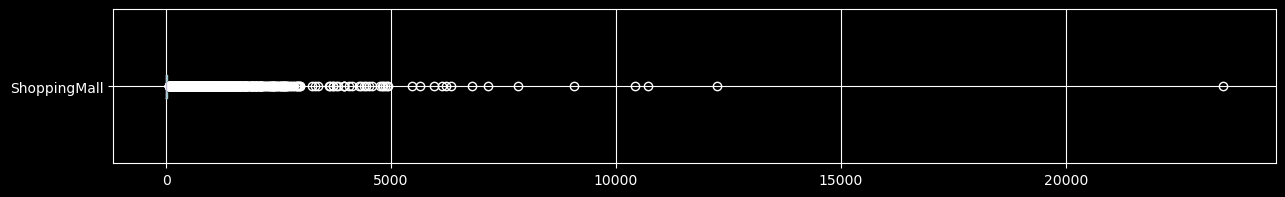

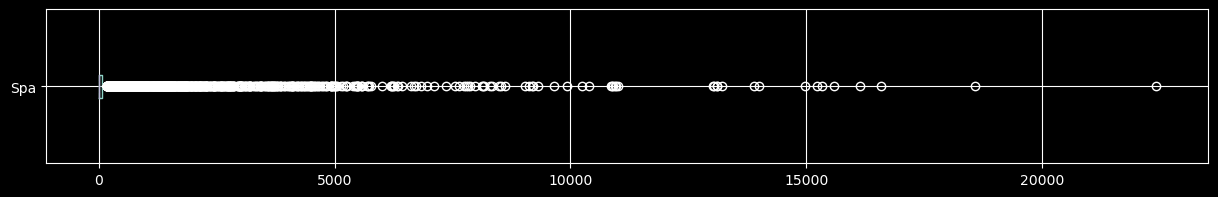

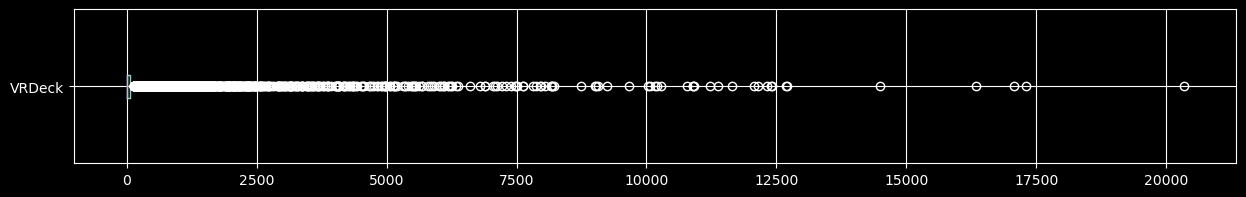

In [48]:
import matplotlib.pyplot as plt

# draw boxplots for all numeric columns horizontally
for col in train_filtered.select_dtypes(include=['float64','int64']).columns:
    train_filtered.boxplot(column=col, vert=False, figsize=(15,2))
    plt.show()

<Axes: xlabel='Transported', ylabel='count'>

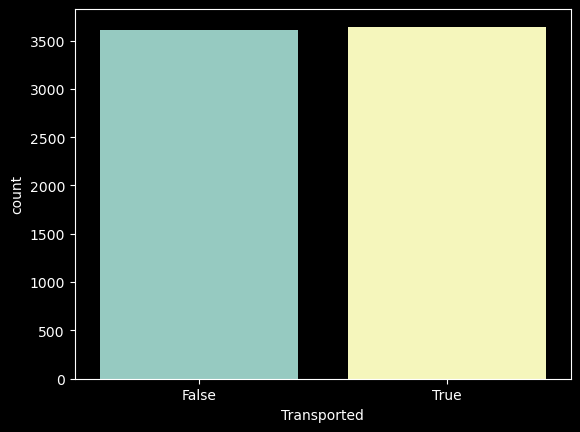

In [49]:
#grafico transported
sns.countplot(x='Transported', data=train_filtered)

In [50]:
N_transp_true = train_filtered[train_filtered['Transported'] == 1].shape[0]
N_transp_false = train_filtered[train_filtered['Transported'] == 0].shape[0]

print('metrica >' , 1-(N_transp_true/(N_transp_true+N_transp_false)))

metrica > 0.49758653978761547


              Destination       Age  RoomService  FoodCourt  ShoppingMall  \
Destination      1.000000  0.006059    -0.042881   0.102484     -0.022410   
Age              0.006059  1.000000     0.067290   0.137094      0.031750   
RoomService     -0.042881  0.067290     1.000000  -0.013000      0.052760   
FoodCourt        0.102484  0.137094    -0.013000   1.000000     -0.012996   
ShoppingMall    -0.022410  0.031750     0.052760  -0.012996      1.000000   
Spa              0.050087  0.123608     0.004132   0.224065      0.015414   
VRDeck           0.069212  0.102814    -0.022217   0.228360     -0.003577   
Transported      0.116017 -0.075193    -0.243618   0.050086      0.011193   

                   Spa    VRDeck  Transported  
Destination   0.050087  0.069212     0.116017  
Age           0.123608  0.102814    -0.075193  
RoomService   0.004132 -0.022217    -0.243618  
FoodCourt     0.224065  0.228360     0.050086  
ShoppingMall  0.015414 -0.003577     0.011193  
Spa           1.00

C:\Users\orp\AppData\Local\Temp\ipykernel_9192\844498082.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_filtered.corr()


<Axes: >

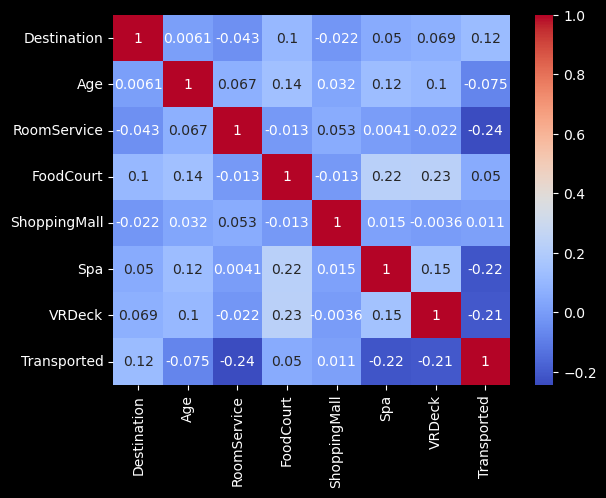

In [51]:
# Calcular la matriz de correlación
corr_matrix = train_filtered.corr()
print(corr_matrix)
# Crear el gráfico de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [52]:
train_ready = train_filtered.copy() #train_filtered[["HomePlanet", "RoomService", "Spa", "VRDeck",'Transported']].copy()
train_ready


c:\ProgramData\anaconda3\Lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,False,2,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,False,0,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,False,2,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


C:\Users\orp\AppData\Local\Temp\ipykernel_9192\3181883890.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_ready.corr()


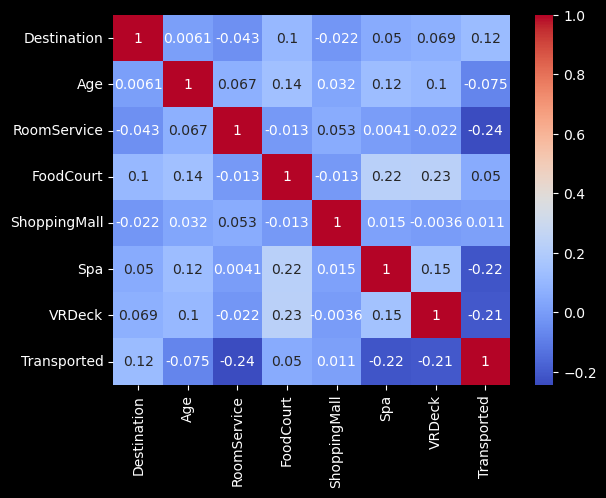

In [53]:
corr_matrix = train_ready.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [54]:
import tensorflow as tf
#optimizador
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer


In [116]:
import tensorflow as tf
#optimizador
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

#columns =  train_ready.columns
#remove transported
#columns = columns.drop('Transported')
#columns =  ['HomePlanet', 'Age', 'RoomService','Destination', 'Spa', 'VRDeck']  #["HomePlanet", "RoomService", "Spa", "VRDeck"]
columns = [ 'CryoSleep',  'Age', 'VIP','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Seleccionar características y etiquetas
X = train_ready[columns].astype(float)
y = train_ready['Transported'].astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler =  MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((5800, 8), (1451, 8), (5800,), (1451,))

# Test others models

In [57]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Generando datos (Asumiendo que ya tienes X_train_scaled, X_test_scaled, y_train y y_test)
# X_train_scaled, X_test_scaled, y_train, y_test = ...

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

roc_scores = []
accuracy_scores = []

# Usando tqdm para mostrar la barra de progreso
with tqdm(total=len(names), desc="Evaluando modelos") as pbar:
    for name, clf in zip(names, classifiers):
        clf.fit(X_train_scaled, y_train)
        
        # Calculando ROC-AUC
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])
        roc_scores.append(roc_score)
        
        # Calculando Accuracy
        accuracy = accuracy_score(y_test, clf.predict(X_test_scaled))
        accuracy_scores.append(accuracy)


        
        #print(f"Modelo {name} - ROC-AUC: {roc_score:.4f}, Accuracy: {accuracy:.4f}")
        pbar.set_description(f"Modelo {name} - ROC-AUC: {roc_score:.4f}, Accuracy: {accuracy:.4f}")
        pbar.update(1)



# Creando un DataFrame para mostrar los resultados
df = pd.DataFrame({
    'Model': names,
    'ROC-AUC': roc_scores,
    'Accuracy': accuracy_scores
})

print(df.sort_values(by=['ROC-AUC'], ascending=False))


Modelo QDA - ROC-AUC: 0.8420, Accuracy: 0.6678: 100%|██████████| 10/10 [06:30<00:00, 39.02s/it]             

               Model   ROC-AUC  Accuracy
3   Gaussian Process  0.871805  0.789111
7           AdaBoost  0.860507  0.788422
4      Decision Tree  0.849536  0.784976
2            RBF SVM  0.846471  0.758787
9                QDA  0.842006  0.667815
8        Naive Bayes  0.840100  0.660924
5      Random Forest  0.834557  0.773260
6         Neural Net  0.800258  0.694004
0  Nearest Neighbors  0.787573  0.740868
1         Linear SVM  0.658102  0.560303


In [58]:

print(df.sort_values(by=['Accuracy'], ascending=False))

               Model   ROC-AUC  Accuracy
3   Gaussian Process  0.871805  0.789111
7           AdaBoost  0.860507  0.788422
4      Decision Tree  0.849536  0.784976
5      Random Forest  0.834557  0.773260
2            RBF SVM  0.846471  0.758787
0  Nearest Neighbors  0.787573  0.740868
6         Neural Net  0.800258  0.694004
9                QDA  0.842006  0.667815
8        Naive Bayes  0.840100  0.660924
1         Linear SVM  0.658102  0.560303


# ML train

In [59]:

clf = GaussianProcessClassifier(1.0 * RBF(1.0))
clf.fit(X_train_scaled, y_train)

# Calculando ROC-AUC
roc_score = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])
# Calculando Accuracy
accuracy = accuracy_score(y_test, clf.predict(X_test_scaled))

print(f"ROC-AUC: {roc_score:.4f}, Accuracy: {accuracy:.4f}")

Modelo QDA - ROC-AUC: 0.8718, Accuracy: 0.7891


In [60]:
import pandas as pd
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import roc_auc_score, accuracy_score

# Suponiendo que ya tienes tus datos divididos en X_train_scaled, X_test_scaled, y_train, y_test

# Lista de parámetros a probar
length_scales = [0.1, 0.5, 1.0, 2.0, 5.0]

results = pd.DataFrame(columns=['length_scale', 'ROC-AUC', 'Accuracy'])


for scale in tqdm(length_scales):
    clf = GaussianProcessClassifier(1.0 * RBF(scale))
    clf.fit(X_train_scaled, y_train)

    # Calculando ROC-AUC
    roc_score = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])
    # Calculando Accuracy
    accuracy = accuracy_score(y_test, clf.predict(X_test_scaled))

    results = results.append({
        'length_scale': scale,
        'ROC-AUC': roc_score,
        'Accuracy': accuracy
    }, ignore_index=True)

print(results.sort_values(by=['ROC-AUC'], ascending=False))


  0%|          | 0/5 [00:00<?, ?it/s]C:\Users\orp\AppData\Local\Temp\ipykernel_23780\1239895411.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
 20%|██        | 1/5 [05:02<20:09, 302.46s/it]C:\Users\orp\AppData\Local\Temp\ipykernel_23780\1239895411.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
 40%|████      | 2/5 [11:15<17:11, 343.71s/it]C:\Users\orp\AppData\Local\Temp\ipykernel_23780\1239895411.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
 60%|██████    | 3/5 [17:08<11:36, 348.30s/it]C:\Users\orp\AppData\Local\Temp\ipykernel_23780\1239895411.py:23: FutureWarning: The frame.append method is deprecated and will be removed fr

   length_scale   ROC-AUC  Accuracy
0           0.1  0.871805  0.789111
1           0.5  0.871805  0.789111
2           1.0  0.871805  0.789111
3           2.0  0.871805  0.789111
4           5.0  0.871805  0.789111


In [61]:
X_train_scaled_full = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
y_train_full = np.concatenate((y_train, y_test), axis=0)


model = GaussianProcessClassifier(1.0 * RBF(1.0))
model.fit(X_train_scaled_full, y_train_full)


GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

# Best LR

In [72]:
import tensorflow as tf
from keras_tuner import RandomSearch
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Aquí, configuramos el learning_rate como hiperparámetro para optimizar
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='auc')])

    return model




In [75]:
tuner = RandomSearch(
    build_model,
    objective=kt.Objective("val_auc", direction="min"),
    max_trials=5,  # número de combinaciones diferentes de hiperparámetros a probar
    executions_per_trial=3,  # número de veces que se ejecuta cada modelo (reduce la variabilidad en la métrica de desempeño)
    directory='random_search_directory',
    project_name='learning_rate_optimization')

# Presupone que tienes x_train, y_train, x_val, y_val ya preparados
tuner.search(X_train_scaled, y_train, epochs=5, validation_data=(X_test_scaled, y_test))


Trial 5 Complete [00h 00m 09s]
val_auc: 0.7183096011479696

Best val_auc So Far: 0.7183096011479696
Total elapsed time: 00h 00m 48s


In [74]:
# Obtiene los mejores hiperparámetros después de realizar la búsqueda
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Extrae el mejor learning_rate del objeto de hiperparámetros
best_learning_rate = best_hp.get('learning_rate')

print(f"El mejor learning_rate encontrado fue: {best_learning_rate}")


El mejor learning_rate encontrado fue: 0.00030930206268121147


# Train Modelo NN

In [69]:
X_train_scaled

array([[1.        , 0.11875   , 0.06533119, 0.33333333, 0.        ,
        0.        ],
       [0.66666667, 0.39618902, 0.        , 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.85091463, 0.        , 0.33333333, 0.        ,
        0.        ],
       ...,
       [0.66666667, 0.72088415, 0.        , 0.33333333, 0.        ,
        0.03304485],
       [0.33333333, 0.74192073, 0.        , 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.11829268, 0.        , 0.33333333, 0.00245448,
        0.36959087]])

In [74]:
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model

model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



input_layer = Input(shape=(X_train_scaled.shape[1], 1))
attention = MultiHeadAttention(num_heads=8, key_dim=64)(input_layer, input_layer)
flatten = Flatten()(attention)
dense = tf.keras.layers.Dense(64, activation='relu')(flatten)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model_transformer = Model(inputs=input_layer, outputs=output)

model_simple = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

X_train_scaled_3d = np.expand_dims(X_train_scaled, axis=-1)
X_test_scaled_3d = np.expand_dims(X_test_scaled, axis=-1)

models = {'LSTM': model_lstm, 'Transformer': model_transformer, 'Simple': model_simple}
results = []

# stop if val_accuracy not improve and take the best model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=20, restore_best_weights=True)

for name, model in tqdm(models.items()):
    if name in ['LSTM', 'Transformer']:
        x_train = X_train_scaled_3d
        x_test = X_test_scaled_3d
    else:
        x_train = X_train_scaled
        x_test = X_test_scaled

    model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    model.fit(x_train, y_train, epochs=1000, batch_size=2, validation_data=(x_test, y_test), callbacks=[early_stopping])
    
    _, accuracy, auc = model.evaluate(x_test, y_test)
    results.append({'Model': name, 'Accuracy': accuracy, 'AUC': auc})

df_results = pd.DataFrame(results)





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/1000
2900/2900 [==============================] - 15s 4ms/step - loss: 0.6934 - accuracy: 0.5059 - auc: 0.5030 - val_loss: 0.6930 - val_accuracy: 0.5127 - val_auc: 0.5171
Epoch 2/1000
2900/2900 [==============================] - 11s 4ms/step - loss: 0.6933 - accuracy: 0.4929 - auc: 0.4967 - val_loss: 0.6929 - val_accuracy: 0.5065 - val_auc: 0.5443
Epoch 3/1000
2900/2900 [==============================] - 11s 4ms/step - loss: 0.6932 - accuracy: 0.5052 - auc: 0.5029 - val_loss: 0.6924 - val_accuracy: 0.5176 - val_auc: 0.5493
Epoch 4/1000
2900/2900 [==============================] - 11s 4ms/step - loss: 0.6922 - accuracy: 0.5229 - auc: 0.5253 - val_loss: 0.6874 - val_accuracy: 0.5548 - val_auc: 0.5674
Epoch 5/1000
2900/2900 [==============================] - 11s 4ms/step - loss: 0.6881 - accuracy: 0.5452 - auc: 0.5538 - val_loss: 0.6831 - val_accuracy: 0.5637 - val_auc: 0.5860
Epoch 6/1000
2900/2900 [==============================] - 11s 4ms/step - loss: 0.6846 - accuracy: 0.5609 

 33%|███▎      | 1/3 [19:11<38:22, 1151.20s/it]

Epoch 1/1000
2900/2900 [==============================] - 6s 2ms/step - loss: 0.6936 - accuracy: 0.4934 - auc: 0.4889 - val_loss: 0.6932 - val_accuracy: 0.4935 - val_auc: 0.5000
Epoch 2/1000
2900/2900 [==============================] - 5s 2ms/step - loss: 0.6933 - accuracy: 0.5059 - auc: 0.5076 - val_loss: 0.6925 - val_accuracy: 0.5065 - val_auc: 0.5419
Epoch 3/1000
2900/2900 [==============================] - 5s 2ms/step - loss: 0.6859 - accuracy: 0.5528 - auc: 0.5712 - val_loss: 0.6993 - val_accuracy: 0.5217 - val_auc: 0.6433
Epoch 4/1000
2900/2900 [==============================] - 5s 2ms/step - loss: 0.6454 - accuracy: 0.6172 - auc: 0.6679 - val_loss: 0.6151 - val_accuracy: 0.6692 - val_auc: 0.7241
Epoch 5/1000
2900/2900 [==============================] - 5s 2ms/step - loss: 0.6162 - accuracy: 0.6471 - auc: 0.7104 - val_loss: 0.6040 - val_accuracy: 0.6582 - val_auc: 0.7367
Epoch 6/1000
2900/2900 [==============================] - 5s 2ms/step - loss: 0.6052 - accuracy: 0.6505 - auc:

 67%|██████▋   | 2/3 [39:14<19:41, 1181.73s/it]

Epoch 1/1000
2900/2900 [==============================] - 4s 1ms/step - loss: 0.6604 - accuracy: 0.6047 - auc: 0.6531 - val_loss: 0.6112 - val_accuracy: 0.6561 - val_auc: 0.7588
Epoch 2/1000
2900/2900 [==============================] - 3s 1ms/step - loss: 0.5744 - accuracy: 0.6995 - auc: 0.7816 - val_loss: 0.5302 - val_accuracy: 0.7739 - val_auc: 0.8280
Epoch 3/1000
2900/2900 [==============================] - 3s 1ms/step - loss: 0.5297 - accuracy: 0.7536 - auc: 0.8177 - val_loss: 0.5020 - val_accuracy: 0.7788 - val_auc: 0.8484
Epoch 4/1000
2900/2900 [==============================] - 3s 1ms/step - loss: 0.5130 - accuracy: 0.7626 - auc: 0.8330 - val_loss: 0.4895 - val_accuracy: 0.7746 - val_auc: 0.8521
Epoch 5/1000
2900/2900 [==============================] - 3s 1ms/step - loss: 0.5023 - accuracy: 0.7722 - auc: 0.8382 - val_loss: 0.4773 - val_accuracy: 0.7857 - val_auc: 0.8600
Epoch 6/1000
2900/2900 [==============================] - 3s 1ms/step - loss: 0.4934 - accuracy: 0.7702 - auc:

100%|██████████| 3/3 [43:02<00:00, 860.78s/it] 


In [76]:
df_results.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy,AUC
2,Simple,0.798070,0.880555
1,Transformer,0.791179,0.876562
0,LSTM,0.784976,0.878433


# Divicion de datos

In [83]:
test_base = pd.read_csv('Spaceship_Titanic/test.csv')
test = test_base.copy()


test['HomePlanet'] = test_base['HomePlanet'].map(lambda s: len(HomePlanet) if s not in HomePlanet else HomePlanet.get_loc(s))
test['Destination'] = test_base['Destination'].map(lambda s: len(Destination) if s not in Destination else Destination.get_loc(s))
test['Cabin'] = test_base['Cabin'].map(lambda s: len(Cabin) if s not in Cabin else Cabin.get_loc(s))

test.fillna(0, inplace=True)

In [84]:
from sklearn.cluster import KMeans
from tensorflow.keras.layers import Input, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
n_splits =  11

## kmeans

In [ ]:
from tqdm import tqdm
# remove ConvergenceWarning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

best_variance = 0

diviciones = pd.DataFrame(columns=['splits', 'variance','columns'])
with tqdm(total=len(all_combinations)) as pbar:
    for combo in all_combinations:
        combo = list(combo)

        for sp in range(3, 20):
            kmeans = KMeans(n_clusters=sp, random_state=0,n_init= 'auto').fit(test[combo])
            test['cluster'] = kmeans.labels_
            # Agregar la columna cluster al dataframe
            X_train['cluster'] = kmeans.predict(X_train[combo])
            data = X_train['cluster'].value_counts()
            variance = data.var()

            diviciones = pd.concat([diviciones, pd.DataFrame([[sp, variance,combo]], columns=['splits', 'variance','columns'])])

            if variance > best_variance:
                best_variance = variance
                best_combination = combo
        # add description to progress bar with best combination and accuracy
        pbar.set_description(f"Best: {best_combination} - {best_variance}")
        pbar.update(1)

diviciones.sort_values(by=['variance'], ascending=False)

In [81]:
diviciones.sort_values(by=['variance'], ascending=False).head(20)

,splits,variance,columns
0,3,9.997190e+06,"[HomePlanet, Age, VIP, RoomService, VRDeck]"
0,3,9.997190e+06,"[HomePlanet, CryoSleep, Age, VIP, RoomService,..."
0,3,9.997190e+06,"[CryoSleep, Destination, Age, VIP, RoomService..."
0,3,9.997190e+06,"[HomePlanet, Cabin, Age, VIP, RoomService, VRD..."
0,3,9.997190e+06,"[HomePlanet, Cabin, VIP, RoomService, VRDeck]"
0,3,9.997190e+06,"[CryoSleep, Cabin, Destination, Age, RoomServi..."
0,3,9.997190e+06,"[Destination, Age, RoomService, VRDeck]"
0,3,9.997190e+06,"[HomePlanet, Cabin, Age, RoomService, VRDeck]"
0,3,9.997190e+06,"[HomePlanet, CryoSleep, RoomService, VRDeck]"
0,3,9.997190e+06,"[Destination, VIP, RoomService, VRDeck]"


In [148]:
n_splits = 3

# Aplicar KMeans para dividir los datos en 6 clusters
kmeans = KMeans(n_clusters=n_splits, random_state=0).fit(test[columns])
test['cluster'] = kmeans.labels_
print(test['cluster'].value_counts())
# Agregar la columna cluster al dataframe
X_train['cluster'] = kmeans.predict(X_train[columns])
data = X_train['cluster'].value_counts()
print(data.sum())

X_test['cluster'] = kmeans.predict(X_test[columns])
data = X_test['cluster'].value_counts()
print(data)
# Convertir el diccionario a una serie de pandas para un manejo más fácil


series = pd.Series(data)
# Cálculo de la varianza
variance = series.var()
print("Varianza:", variance)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    4090
1     133
2      54
Name: cluster, dtype: int64
5800
0    1386
1      51
2      14
Name: cluster, dtype: int64
Varianza: 610996.3333333333


In [119]:
#drop Cabin
X_train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'cluster'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

for i in range(n_splits):
    # Calcular la matriz de correlación
    corr_matrix = X_train[[ 'CryoSleep',  'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']][X_train['cluster'] == i].corr()
    # Crear el gráfico de correlación
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()



In [149]:
n_splits = 21

subdata= test[columns][test['cluster'] == 0].copy()
kmeans = KMeans(n_clusters=n_splits, random_state=0).fit(subdata)
subdata['cluster'] = kmeans.labels_
print(subdata['cluster'].value_counts())

X_train['cluster'] = kmeans.predict(X_train[columns])
data = X_train['cluster'].value_counts()
print(data)

X_test['cluster'] = kmeans.predict(X_test[columns])
data = X_test['cluster'].value_counts()
print(data)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1     1941
14     316
20     312
13     288
4      282
11     255
0      169
3       93
19      90
5       76
10      67
6       65
12      29
16      27
2       22
15      16
17      15
8       11
7        9
9        6
18       1
Name: cluster, dtype: int64
1     2556
20     446
14     414
11     389
4      377
13     365
3      254
0      210
19     142
6      127
5      114
10      88
16      82
12      57
2       50
17      38
9       25
15      24
8       21
7       20
18       1
Name: cluster, dtype: int64
1     619
20    125
14    124
13    112
4      90
11     81
3      66
0      65
16     25
6      25
10     23
19     20
5      19
12     14
2      10
17      7
7       7
15      6
9       6
8       6
18      1
Name: cluster, dtype: int64


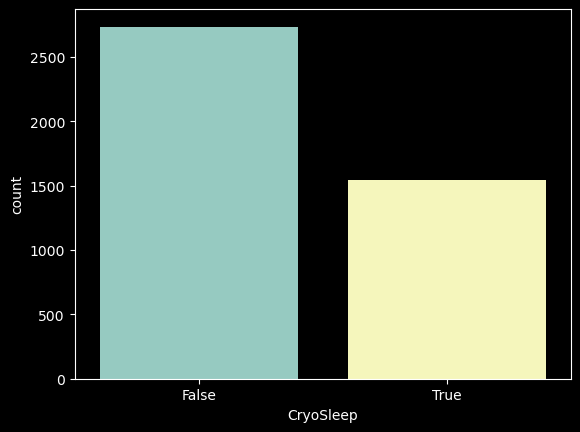

Index(['FoodCourt', 'VRDeck', 'Spa', 'RoomService', 'ShoppingMall', 'Age',
       'Destination', 'HomePlanet', 'Transported', 'CryoSleep', 'cluster',
       'VIP', 'Cabin'],
      dtype='object')


C:\Users\orp\AppData\Local\Temp\ipykernel_9192\3682980074.py:5: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = test.var()


In [150]:
#plot distribution of VIP
sns.countplot(x='CryoSleep', data=test)
plt.show()

variances = test.var()
print(variances.sort_values(ascending=False).index)


## AgglomerativeClustering

In [37]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar Agglomerative Clustering para dividir los datos en 12 clusters
agglo = AgglomerativeClustering(n_clusters=n_splits).fit(test[columns])
test['cluster'] = agglo.labels_
print(test['cluster'].value_counts())

# Agregar la columna cluster al dataframe
X_train['cluster'] = agglo.fit_predict(X_train[columns])
print(X_train['cluster'].value_counts())


9     2405
8      627
2      467
6      423
7      109
1       87
0       64
10      42
4       28
3       15
5       10
Name: cluster, dtype: int64
5     1260
3     1084
7     1077
4      956
9      838
2      165
8      132
6      100
10      76
0       69
1       43
Name: cluster, dtype: int64


## DBSCAN

In [47]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(test[columns])
test['cluster'] = dbscan.labels_+1
print(test['cluster'].value_counts())

# Agregar la columna cluster al dataframe
X_train['cluster'] = dbscan.fit_predict(X_train[columns])+1
print(X_train['cluster'].value_counts())


0     2351
1      576
5      363
3      264
2      227
6      203
4      143
7       51
8       21
12      17
11      11
16      10
10       9
9        8
13       7
14       6
15       5
17       5
Name: cluster, dtype: int64
0    5737
2      26
5      14
1      10
4       8
3       5
Name: cluster, dtype: int64


##  Mean Shift

In [51]:
from sklearn.cluster import MeanShift

# Aplicar Mean Shift
mean_shift = MeanShift().fit(test[columns])
test['cluster'] = mean_shift.labels_
print(test['cluster'].value_counts())

# Agregar la columna cluster al dataframe
X_train['cluster'] = mean_shift.fit_predict(X_train[columns])
print(X_train['cluster'].value_counts())

0     3791
23      90
1       80
5       80
2       25
      ... 
65       1
44       1
50       1
36       1
53       1
Name: cluster, Length: 66, dtype: int64
0     2798
1     2688
4       58
3       55
2       34
17      26
24      18
18      14
8       13
33      11
31       9
11       8
9        7
6        6
10       5
39       5
7        5
5        5
12       4
16       3
15       2
13       2
14       2
25       2
21       1
38       1
35       1
20       1
36       1
22       1
40       1
34       1
43       1
27       1
41       1
30       1
28       1
37       1
26       1
23       1
19       1
32       1
29       1
42       1
Name: cluster, dtype: int64


## Analizis cluster

In [151]:
for i in range(n_splits):
    cluster_data = X_train[X_train['cluster'] == i]
    value = y_train[X_train['cluster'] == i].value_counts()
    try:
        print(f"Cluster {i} - {cluster_data.shape[0]} registros", value[0]/(value[0]+value[1]))
    except:
        print(f"Cluster {i} - {cluster_data.shape[0]} registros", 1.0)

Cluster 0 - 210 registros 0.8714285714285714
Cluster 1 - 2556 registros 0.24256651017214398
Cluster 2 - 50 registros 0.94
Cluster 3 - 254 registros 0.16535433070866143
Cluster 4 - 377 registros 0.870026525198939
Cluster 5 - 114 registros 0.3157894736842105
Cluster 6 - 127 registros 0.952755905511811
Cluster 7 - 20 registros 1.0
Cluster 8 - 21 registros 0.19047619047619047
Cluster 9 - 25 registros 1.0
Cluster 10 - 88 registros 0.8863636363636364
Cluster 11 - 389 registros 0.8380462724935732
Cluster 12 - 57 registros 0.9824561403508771
Cluster 13 - 365 registros 0.4931506849315068
Cluster 14 - 414 registros 0.8381642512077294
Cluster 15 - 24 registros 1.0
Cluster 16 - 82 registros 0.7073170731707317
Cluster 17 - 38 registros 1.0
Cluster 18 - 1 registros 1.0
Cluster 19 - 142 registros 0.8732394366197183
Cluster 20 - 446 registros 0.5246636771300448


In [152]:
models = []


for i in range(n_splits):
    x_train_cluster = X_train_scaled[X_train['cluster'] == i]
    y_train_cluster = y_train[X_train['cluster'] == i]

    x_test_cluster = X_test_scaled[X_test['cluster'] == i]
    y_test_cluster = y_test[X_test['cluster'] == i]

    y_train_cluster_onehot = tf.keras.utils.to_categorical(y_train_cluster, num_classes=2)
    y_test_onehot = tf.keras.utils.to_categorical(y_test_cluster, num_classes=2)

    
    model_simple = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='tanh'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])

    model_simple.compile(optimizer=Adam(learning_rate=0.0003), 
                              loss='categorical_crossentropy',
                              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=20, restore_best_weights=True)
    model_simple.fit(x_train_cluster, y_train_cluster_onehot, epochs=1000, batch_size=2, validation_data=(x_test_cluster, y_test_onehot), callbacks=[early_stopping], verbose=0)
    #get best model val_accuracy
    best_val_accuracy = max(model_simple.history.history['val_accuracy'])
    print(f"{i} La mejor val_accuracy del modelo fue: {best_val_accuracy} \t\t {len(x_train_cluster)}")
    models.append(model_simple)


0 La mejor val_accuracy del modelo fue: 0.9538461565971375 		 210
1 La mejor val_accuracy del modelo fue: 0.8206785321235657 		 2556
2 La mejor val_accuracy del modelo fue: 0.699999988079071 		 50
3 La mejor val_accuracy del modelo fue: 0.9242424368858337 		 254
4 La mejor val_accuracy del modelo fue: 0.8333333134651184 		 377
5 La mejor val_accuracy del modelo fue: 0.6842105388641357 		 114
6 La mejor val_accuracy del modelo fue: 1.0 		 127
7 La mejor val_accuracy del modelo fue: 1.0 		 20
8 La mejor val_accuracy del modelo fue: 0.8333333134651184 		 21
9 La mejor val_accuracy del modelo fue: 1.0 		 25
10 La mejor val_accuracy del modelo fue: 0.9130434989929199 		 88
11 La mejor val_accuracy del modelo fue: 0.9135802388191223 		 389
12 La mejor val_accuracy del modelo fue: 1.0 		 57
13 La mejor val_accuracy del modelo fue: 0.6428571343421936 		 365
14 La mejor val_accuracy del modelo fue: 0.8225806355476379 		 414
15 La mejor val_accuracy del modelo fue: 1.0 		 24
16 La mejor val_accu

In [ ]:

# 1. Dividir los datos de entrenamiento y prueba en 6 partes.
n_splits = 6
x_train_splits = np.array_split(X_train_scaled, n_splits)
y_train_splits = np.array_split(y_train, n_splits)

# 2. Definir y entrenar el modelo simple en cada parte.
models = []

for i in range(n_splits):

    input_layer = Input(shape=(X_train_scaled.shape[1], 1))
    attention = MultiHeadAttention(num_heads=8, key_dim=64)(input_layer, input_layer)
    flatten = Flatten()(attention)
    dense = tf.keras.layers.Dense(64, activation='relu')(flatten)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

    model_transformer = Model(inputs=input_layer, outputs=output)

    
    model_transformer.compile(optimizer=Adam(learning_rate=0.0003), 
                         loss='binary_crossentropy', 
                         metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=20, restore_best_weights=True)
    model_transformer.fit(x_train_splits[i], y_train_splits[i], epochs=1000, batch_size=2, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])
    
    models.append(model_transformer)


In [153]:
# 3. Promediar las respuestas de todos los modelos.
predictions = []

for i in range(n_splits):
    x_train_cluster = X_train_scaled[X_train['cluster'] == i]
    y_train_cluster = y_train[X_train['cluster'] == i]

    predictions =models[i].predict(x_train_cluster)
    
    avg_predictions = np.argmax(predictions, axis=1).flatten()

    accuracy = np.mean(avg_predictions == y_train_cluster)
    auc_score = tf.keras.metrics.AUC()
    auc_score.update_state(y_train_cluster, avg_predictions)
    auc = auc_score.result().numpy()

    results = {
        'Model': f'Cluster {i}',
        'Accuracy': accuracy,
        'AUC': auc,
        'Len': len(y_train_cluster)
    }

    print(results)


7/7 [==============================] - 0s 833us/step
{'Model': 'Cluster 0', 'Accuracy': 0.8714285714285714, 'AUC': 0.5, 'Len': 210}
80/80 [==============================] - 0s 760us/step
{'Model': 'Cluster 1', 'Accuracy': 0.7867762128325508, 'AUC': 0.5966642, 'Len': 2556}
2/2 [==============================] - 0s 2ms/step
{'Model': 'Cluster 2', 'Accuracy': 0.94, 'AUC': 0.5, 'Len': 50}
8/8 [==============================] - 0s 1ms/step
{'Model': 'Cluster 3', 'Accuracy': 0.8464566929133859, 'AUC': 0.6216307, 'Len': 254}
12/12 [==============================] - 0s 818us/step
{'Model': 'Cluster 4', 'Accuracy': 0.870026525198939, 'AUC': 0.5, 'Len': 377}
4/4 [==============================] - 0s 1ms/step
{'Model': 'Cluster 5', 'Accuracy': 0.6929824561403509, 'AUC': 0.52884614, 'Len': 114}
4/4 [==============================] - 0s 1ms/step
{'Model': 'Cluster 6', 'Accuracy': 0.952755905511811, 'AUC': 0.5, 'Len': 127}
1/1 [==============================] - 0s 57ms/step
{'Model': 'Cluster 7', 'A

# Train

In [77]:
# Crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
#lr = 0.01
model.compile(optimizer= Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# stop if val_accuracy not improve and take the best model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=20, restore_best_weights=True)

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=1000, batch_size=2, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])


Epoch 1/1000
2900/2900 [==============================] - 4s 1ms/step - loss: 0.6523 - accuracy: 0.6229 - auc: 0.6757 - val_loss: 0.5924 - val_accuracy: 0.7085 - val_auc: 0.7827
Epoch 2/1000
2900/2900 [==============================] - 3s 1ms/step - loss: 0.5659 - accuracy: 0.7064 - auc: 0.7834 - val_loss: 0.5259 - val_accuracy: 0.7567 - val_auc: 0.8254
Epoch 3/1000
2900/2900 [==============================] - 3s 1ms/step - loss: 0.5285 - accuracy: 0.7526 - auc: 0.8198 - val_loss: 0.5011 - val_accuracy: 0.7753 - val_auc: 0.8423
Epoch 4/1000
2900/2900 [==============================] - 3s 1ms/step - loss: 0.5115 - accuracy: 0.7664 - auc: 0.8312 - val_loss: 0.4863 - val_accuracy: 0.7905 - val_auc: 0.8560
Epoch 5/1000
2900/2900 [==============================] - 3s 1ms/step - loss: 0.5006 - accuracy: 0.7681 - auc: 0.8402 - val_loss: 0.4764 - val_accuracy: 0.7815 - val_auc: 0.8620
Epoch 6/1000
2900/2900 [==============================] - 3s 1ms/step - loss: 0.4896 - accuracy: 0.7771 - auc:

In [78]:
#get best model val_accuracy
best_val_accuracy = max(model.history.history['val_accuracy'])
print(f"La mejor val_accuracy del modelo fue: {best_val_accuracy}")

La mejor val_accuracy del modelo fue: 0.8111647367477417


# Train Force Variables

In [73]:
import pandas as pd
from itertools import combinations

columns =  train_ready.columns
# Genera todas las combinaciones posibles de las columnas
from itertools import combinations

# Tus columnas
#columns = ['HomePlanet', 'Destination', 'RoomService', 'Spa', 'VRDeck']
#remove transported
columns = columns.drop('Transported')

# Genera todas las combinaciones posibles de las columnas para grupos de 1, 2, 3 y 4
all_combinations = []
for r in range(4, 200):  # Ahora solo va hasta 4
    all_combinations.extend(combinations(columns, r))


len(all_combinations),all_combinations

(1816,
 [('HomePlanet', 'CryoSleep', 'Cabin', 'Destination'),
  ('HomePlanet', 'CryoSleep', 'Cabin', 'Age'),
  ('HomePlanet', 'CryoSleep', 'Cabin', 'VIP'),
  ('HomePlanet', 'CryoSleep', 'Cabin', 'RoomService'),
  ('HomePlanet', 'CryoSleep', 'Cabin', 'FoodCourt'),
  ('HomePlanet', 'CryoSleep', 'Cabin', 'ShoppingMall'),
  ('HomePlanet', 'CryoSleep', 'Cabin', 'Spa'),
  ('HomePlanet', 'CryoSleep', 'Cabin', 'VRDeck'),
  ('HomePlanet', 'CryoSleep', 'Destination', 'Age'),
  ('HomePlanet', 'CryoSleep', 'Destination', 'VIP'),
  ('HomePlanet', 'CryoSleep', 'Destination', 'RoomService'),
  ('HomePlanet', 'CryoSleep', 'Destination', 'FoodCourt'),
  ('HomePlanet', 'CryoSleep', 'Destination', 'ShoppingMall'),
  ('HomePlanet', 'CryoSleep', 'Destination', 'Spa'),
  ('HomePlanet', 'CryoSleep', 'Destination', 'VRDeck'),
  ('HomePlanet', 'CryoSleep', 'Age', 'VIP'),
  ('HomePlanet', 'CryoSleep', 'Age', 'RoomService'),
  ('HomePlanet', 'CryoSleep', 'Age', 'FoodCourt'),
  ('HomePlanet', 'CryoSleep', 'Age', 

In [67]:
def train_model_with_columns(selected_columns):
    # Seleccionar características y etiquetas
    X = train_ready[selected_columns].astype(float)
    y = train_ready['Transported'].astype(int)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalar los datos
    scaler =  MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Crear el modelo
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compilar el modelo
    #lr = 0.01
    model.compile(optimizer= Adagrad(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

    # stop if val_accuracy not improve and take the best model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

    # Entrenar el modelo
    model.fit(X_train_scaled, y_train, epochs=200, batch_size=2, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping], verbose=0)
    
    return max(model.history.history['val_accuracy'])

In [68]:
from tqdm import tqdm

# Asume que tienes un dataframe df con tus datos
best_accuracy = 0.0
best_combination = None

convinaciones = pd.DataFrame(columns=['convinacion','val_accuracy'])
with tqdm(total=len(all_combinations)) as pbar:
    for combo in all_combinations:
        combo = list(combo)
        accuracy = train_model_with_columns(combo)

        convinaciones = pd.concat([convinaciones, pd.DataFrame([[combo,accuracy]], columns=['convinacion','val_accuracy'])])
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = combo
        # add description to progress bar with best combination and accuracy
        pbar.set_description(f"Best: {best_combination} - {best_accuracy}")
        pbar.update(1)


print(f"La mejor combinación de columnas es: {best_combination} con un val_accuracy de {best_accuracy}")

convinaciones.sort_values(by=['val_accuracy'], ascending=False)

Best: ['HomePlanet', 'Cabin', 'RoomService', 'Spa', 'VRDeck'] - 0.785025954246521: 100%|██████████| 1816/1816 [3:51:31<00:00,  7.65s/it]  

La mejor combinación de columnas es: ['HomePlanet', 'Cabin', 'RoomService', 'Spa', 'VRDeck'] con un val_accuracy de 0.785025954246521


,convinacion,val_accuracy
0,"[HomePlanet, Cabin, RoomService, Spa, VRDeck]",0.785026
0,"[HomePlanet, Destination, RoomService, Spa, VR...",0.785026
0,"[HomePlanet, Cabin, Destination, RoomService, ...",0.784285
0,"[Cabin, Destination, RoomService, Spa, VRDeck]",0.783543
0,"[HomePlanet, RoomService, Spa, VRDeck]",0.782802
...,...,...
0,"[CryoSleep, Destination, VIP, RoomService, VRD...",0.409192
0,"[CryoSleep, Destination, VIP, RoomService, Spa]",0.409192
0,"[CryoSleep, Destination, VIP, RoomService, Sho...",0.409192
0,"[CryoSleep, Destination, VIP, RoomService, Foo...",0.409192


In [82]:
convinaciones.sort_values(by=['val_accuracy'], ascending=False).head(10)

,convinacion,val_accuracy
0,"[HomePlanet, Cabin, RoomService, Spa, VRDeck]",0.785026
0,"[HomePlanet, Destination, RoomService, Spa, VR...",0.785026
0,"[HomePlanet, Cabin, Destination, RoomService, ...",0.784285
0,"[Cabin, Destination, RoomService, Spa, VRDeck]",0.783543
0,"[HomePlanet, RoomService, Spa, VRDeck]",0.782802
0,"[Destination, RoomService, Spa, VRDeck]",0.782061
0,"[Cabin, RoomService, Spa, VRDeck]",0.782061
0,"[HomePlanet, Cabin, Destination, RoomService, ...",0.760563
0,"[Cabin, Destination, RoomService, Spa]",0.759822
0,"[HomePlanet, Cabin, RoomService, Spa]",0.759822


# Train Force Filter

In [22]:
from tqdm import tqdm
import numpy as np


def train_model_filter(porcen_filter_outer_up):
    # Seleccionar características y etiquetas
    columns = ["HomePlanet", "RoomService", "Spa", "VRDeck"]


    train_temp = train.copy()

    # #and filter > 95%
    train_temp = train_temp[train_temp.VRDeck < train_temp.VRDeck.quantile(porcen_filter_outer_up[0])]
    train_temp = train_temp[train_temp.Spa < train_temp.Spa.quantile(porcen_filter_outer_up[1])]
    train_temp = train_temp[train_temp.RoomService < train_temp.RoomService.quantile(porcen_filter_outer_up[2])]


    X = train_temp[columns].astype(float)
    y = train_temp['Transported'].astype(int)


    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalar los datos
    scaler =  MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Crear el modelo
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compilar el modelo
    #lr = 0.01
    model.compile(optimizer= Adam(learning_rate=0.003), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])

    # stop if val_accuracy not improve and take the best model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True)

    # Entrenar el modelo
    model.fit(X_train_scaled, y_train, epochs=200, batch_size=2, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping], verbose=0)
    
    return max(model.history.history['val_auc'])




In [23]:
from itertools import permutations

filtros = np.arange(0.84, 1.0, 0.05)


filtros = list(permutations(filtros, 3))
filtros

[(0.84, 0.89, 0.9400000000000001),
 (0.84, 0.89, 0.9900000000000001),
 (0.84, 0.9400000000000001, 0.89),
 (0.84, 0.9400000000000001, 0.9900000000000001),
 (0.84, 0.9900000000000001, 0.89),
 (0.84, 0.9900000000000001, 0.9400000000000001),
 (0.89, 0.84, 0.9400000000000001),
 (0.89, 0.84, 0.9900000000000001),
 (0.89, 0.9400000000000001, 0.84),
 (0.89, 0.9400000000000001, 0.9900000000000001),
 (0.89, 0.9900000000000001, 0.84),
 (0.89, 0.9900000000000001, 0.9400000000000001),
 (0.9400000000000001, 0.84, 0.89),
 (0.9400000000000001, 0.84, 0.9900000000000001),
 (0.9400000000000001, 0.89, 0.84),
 (0.9400000000000001, 0.89, 0.9900000000000001),
 (0.9400000000000001, 0.9900000000000001, 0.84),
 (0.9400000000000001, 0.9900000000000001, 0.89),
 (0.9900000000000001, 0.84, 0.89),
 (0.9900000000000001, 0.84, 0.9400000000000001),
 (0.9900000000000001, 0.89, 0.84),
 (0.9900000000000001, 0.89, 0.9400000000000001),
 (0.9900000000000001, 0.9400000000000001, 0.84),
 (0.9900000000000001, 0.9400000000000001,

In [24]:

from tqdm import tqdm
import numpy as np

# Asume que tienes un dataframe df con tus datos
best_accuracy = 0.0
best_combination = None


convinaciones = pd.DataFrame(columns=['filter','val_auc'])
with tqdm(total=len(filtros)) as pbar:
    for fil in filtros:
        accuracy = train_model_filter(fil)

        convinaciones = pd.concat([convinaciones, pd.DataFrame([[fil,accuracy]], columns=['filter','val_auc'])])
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = fil
        # add description to progress bar with best combination and accuracy
        pbar.set_description(f"Best: {best_combination} - {best_accuracy}")
        pbar.update(1)


print(f"La mejor filtro es: {best_combination} con un val_auc de {best_accuracy}")

convinaciones.sort_values(by=['val_auc'], ascending=False)

Best: (0.89, 0.9900000000000001, 0.9400000000000001) - 0.8555247783660889: 100%|██████████| 24/24 [07:07<00:00, 17.81s/it]

La mejor filtro es: (0.89, 0.9900000000000001, 0.9400000000000001) con un val_auc de 0.8555247783660889


,filter,val_auc
0,"(0.89, 0.9900000000000001, 0.9400000000000001)",0.855525
0,"(0.9400000000000001, 0.9900000000000001, 0.84)",0.842285
0,"(0.9400000000000001, 0.84, 0.9900000000000001)",0.839451
0,"(0.9900000000000001, 0.89, 0.9400000000000001)",0.838579
0,"(0.9400000000000001, 0.89, 0.9900000000000001)",0.834183
0,"(0.9400000000000001, 0.9900000000000001, 0.89)",0.833348
0,"(0.84, 0.9400000000000001, 0.9900000000000001)",0.830760
0,"(0.9900000000000001, 0.9400000000000001, 0.89)",0.828915
0,"(0.84, 0.9900000000000001, 0.9400000000000001)",0.828673
0,"(0.89, 0.9400000000000001, 0.9900000000000001)",0.826542


# Save Test file

In [154]:
test_base = pd.read_csv('Spaceship_Titanic/test.csv')
test = test_base.copy()


test['HomePlanet'] = test_base['HomePlanet'].map(lambda s: len(HomePlanet) if s not in HomePlanet else HomePlanet.get_loc(s))
test['Destination'] = test_base['Destination'].map(lambda s: len(Destination) if s not in Destination else Destination.get_loc(s))
test['Cabin'] = test_base['Cabin'].map(lambda s: len(Cabin) if s not in Cabin else Cabin.get_loc(s))

test.fillna(0, inplace=True)

In [155]:
test['cluster'] = kmeans.predict(test[columns])
test['cluster'].value_counts()

1     1941
14     316
20     312
13     288
4      282
11     255
3      173
0      169
6       98
19      90
5       76
10      67
16      61
2       33
12      29
17      27
15      19
9       17
8       13
7       10
18       1
Name: cluster, dtype: int64

In [156]:
#remove of columns Transported and Destination
columns =  train_ready.columns
columns = columns.drop('Transported')
columns = columns.drop('Destination')


In [157]:
test['Transported'] = 0

In [158]:

#generate groups to each model
#test['cluster'] = kmeans.predict(test[columns])
print(test['cluster'].value_counts())

for c in test['cluster'].value_counts().index:
    data = test[test['cluster'] == c][columns]
    data = scaler.transform(data)
    data = models[c].predict(data.astype(float))

    test.loc[test['cluster'] == c, 'Transported'] = np.argmax(data, axis=1).flatten()

# 4. Evaluar el AUC y el Accuracy del enfoque combinado.

#test['Transported'] = np.mean([ model.predict(scaler.transform(test[columns].astype(float))) for model in models], axis=0)


#test['Transported'] = model.predict(scaler.transform(test[columns].astype(float)))
#test['Transported']  = test['Transported'].apply(lambda x: 1 if x > 0.5 else 0)
test['Transported'] = test['Transported'].astype(bool)

#save test
test[['PassengerId','Transported']].to_csv('Spaceship_Titanic/test_send.csv', index=False)
test.head()
test['Transported'].value_counts(normalize=True)

1     1941
14     316
20     312
13     288
4      282
11     255
3      173
0      169
6       98
19      90
5       76
10      67
16      61
2       33
12      29
17      27
15      19
9       17
8       13
7       10
18       1
Name: cluster, dtype: int64
1/1 [==============================] - 0s 16ms/step


True     0.564414
False    0.435586
Name: Transported, dtype: float64